### Step 1 - Data load

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


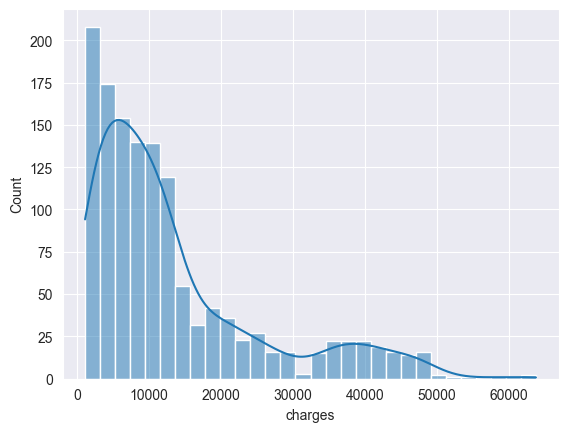

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dados.csv')

display(df.info())
display(df.describe())

sns.histplot(df['charges'], kde=True)
plt.show()


### Step 2 - Handling missing data

In [9]:
from sklearn.preprocessing import LabelEncoder
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df['region'] = LabelEncoder().fit_transform(df['region'])

display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [11]:
display(df.isnull().sum())

df.dropna(inplace=True)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Step 3 - Division of Data into Training and Testing

In [12]:
from sklearn.model_selection import train_test_split

# Separar as variáveis independentes (X) e a dependente (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Dividir o conjunto em treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 4 - Linear Regression model

In [13]:
from sklearn.linear_model import LinearRegression

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)


LinearRegression()

### Step 5 - Model Evaluation

In [14]:
from sklearn.metrics import mean_absolute_error, r2_score

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
display("R²:", r2_score(y_test, y_pred))
display("MAE:", mean_absolute_error(y_test, y_pred))

'R²:'

0.7833463107364539

'MAE:'

np.float64(4186.508898366428)

### Step 6 - Plot

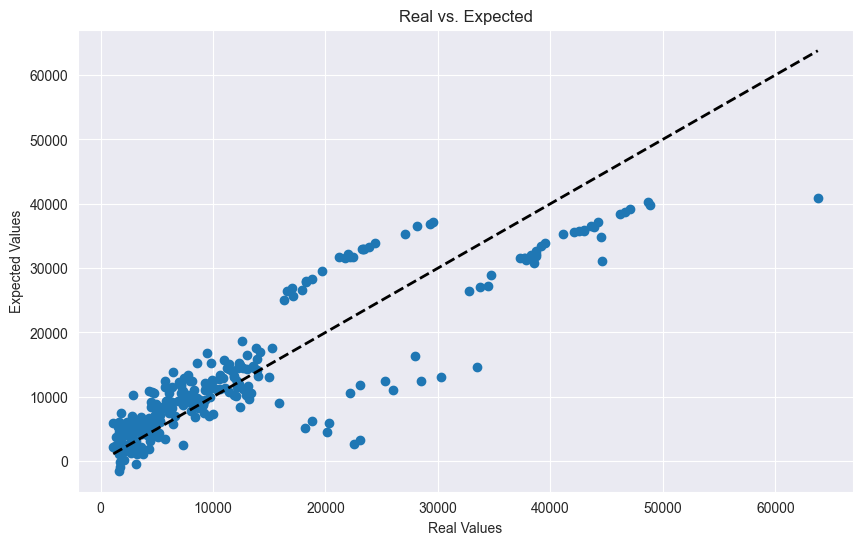

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Expected Values')
plt.title('Real vs. Expected')
plt.show()


Entre os dois modelos, a regressão linear é mais intuitiva e clara para fazer a correlação dos dados. Isso ocorre porque a regressão linear é construída com base na suposição de que existe uma relação linear entre as variáveis independentes (idade, IMC, fumante, etc.) e a variável dependente (encargos médicos). Com isso, fica mais fácil interpretar os coeficientes das variáveis e entender a importância de cada uma delas.

No caso da árvore de decisão, embora seja um modelo poderoso e interprete bem as interações não lineares, a relação entre as variáveis e o alvo não é diretamente expressa em termos de correlações ou coeficientes. A interpretação é feita com base na importância das variáveis, que pode ser um pouco menos clara do que na regressão linear, que dá coeficientes diretamente relacionados à influência de cada variável.

Portanto, para compreender e explicar a correlação entre as variáveis e o alvo de maneira mais clara, a regressão linear é a escolha mais simples e direta.